In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:28<00:00, 54.0MB/s]



Mount the Google Drive to move the downloaded zip file to google drive so that we don't have to download all the time

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
mv '/content/chest-xray-pneumonia.zip' 'gdrive/MyDrive/Colab Notebooks/chest-xray-pneumonia/dataset/'

mv: cannot stat '/content/chest-xray-pneumonia.zip': No such file or directory


 ---------------------------------------------------------------------

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
mkdir /content/dataset/

In [4]:
mkdir /content/dataset/fid

In [5]:
mkdir /content/dataset/oid

In [6]:
! unzip "gdrive/MyDrive/Colab Notebooks/chest-xray-pneumonia/dataset/chest-xray-pneumonia" -d /content/dataset/oid

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/oid/chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: /content/dataset/oid/chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: /content/dataset/oid/chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: /content/dataset/oid/chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: /content/dataset/oid/chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: /content/dataset/oid/chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: /content/dataset/oid/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: /content/dataset/oid/chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: /content/dataset/oid/chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: /content/dataset/oid/chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: /content/dataset/oid/chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: /content/dataset/oid/chest_xray/train/NORMAL/IM-0442-

In [7]:
mkdir /content/output

In [8]:
mkdir /content/utils

In [10]:
cp 'gdrive/MyDrive/Colab Notebooks/chest-xray-pneumonia/utils/config.py' '/content/utils/config.py'

In [12]:
cp 'gdrive/MyDrive/Colab Notebooks/chest-xray-pneumonia/utils/create_dataset.py' '/content/utils/create_dataset.py'

In [13]:
cp 'gdrive/MyDrive/Colab Notebooks/chest-xray-pneumonia/utils/getPaths.py' '/content/utils/getPaths.py'

In [14]:
rm -rf /content/dataset/fid/chest_xray/__MACOSX

In [15]:
rm -rf /content/dataset/fid/chest_xray/chest_xray

In [16]:
mv '/content/dataset/oid/chest_xray/test' '/content/dataset/oid/'

In [17]:
mv '/content/dataset/oid/chest_xray/train' '/content/dataset/oid/'

In [18]:
mv '/content/dataset/oid/chest_xray/val' '/content/dataset/oid/'

In [19]:
rm -rf '/content/dataset/oid/chest_xray'

In [20]:
rm -rf '/content/dataset/oid/test/.ipynb_checkpoints'

In [22]:
rm -rf '/content/dataset/oid/train/.ipynb_checkpoints'

In [21]:
rm -rf '/content/dataset/oid/val/.ipynb_checkpoints'

In [23]:
mv '/content/dataset/oid/train/NORMAL' '/content/dataset/oid/train/0'

In [24]:
mv '/content/dataset/oid/train/PNEUMONIA' '/content/dataset/oid/train/1'

In [25]:
mv '/content/dataset/oid/test/NORMAL' '/content/dataset/oid/test/0'

In [26]:
mv '/content/dataset/oid/test/PNEUMONIA' '/content/dataset/oid/test/1'

In [27]:
mv '/content/dataset/oid/val/NORMAL' '/content/dataset/oid/val/0'

In [28]:
mv '/content/dataset/oid/val/PNEUMONIA' '/content/dataset/oid/val/1'

In [29]:
! python /content/utils/create_dataset.py

Building 'training' split
'Creating /content/dataset/fid/training' directory
'creating /content/dataset/fid/training/1' directory
'creating /content/dataset/fid/training/0' directory
Building 'validation' split
'Creating /content/dataset/fid/validation' directory
'creating /content/dataset/fid/validation/1' directory
'creating /content/dataset/fid/validation/0' directory
Building 'testing' split
'Creating /content/dataset/fid/testing' directory
'creating /content/dataset/fid/testing/1' directory
'creating /content/dataset/fid/testing/0' directory


-------------------------------------------------------------------------------

In [ ]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/gdrive')

In [30]:
# Google Drive Path
gDrivePath = "gdrive/MyDrive/Colab Notebooks/chest-xray-pneumonia/dataset/"

In [31]:
import sys
sys.path.append(gDrivePath)

In [32]:
# Setting the matplotlib backend so that if required then images can be saved in the background
import matplotlib
matplotlib.use("Agg")
%matplotlib inline

In [33]:
# Importing the libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from tensorflow.keras.optimizers import Adam
from utils import config
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import pandas as pd
import seaborn as sns
import cv2

In [34]:
pip install seaborn

In [35]:
# Defining a function for plotting the count of both classes
def plotData(dirPath):
    #path to both classes
    normal_cases_dir = dirPath+ '/0/'
    pneumonia_cases_dir = dirPath + '/1/'
    normal_cases = glob.glob(normal_cases_dir + '*.jpeg')
    pneumonia_cases = glob.glob(pneumonia_cases_dir + '*.jpeg')

    # An empty list. We will insert the data into this list in (img_path, label) format
    data1 = []

    # 0 for normal classs
    for img in normal_cases:
        data1.append((img,0))

    # 1 for pneumonia class
    for img in pneumonia_cases:
        data1.append((img, 1))
    data1 = pd.DataFrame(data1, columns=['image', 'label'],index=None)

    # Shuffle the data
    data1 = data1.sample(frac=1.).reset_index(drop=True)



    # Get the counts for each class
    cases_count = data1['label'].value_counts()
    print(cases_count)

    # Plot the results
    plt.figure(figsize=(10,8))
    sns.barplot(x=cases_count.index, y= cases_count.values)
    plt.title('Number of cases', fontsize=14)
    plt.xlabel('Case type', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'Pneumonia(1)'])
    plt.show()

label
1    3067
0    1149
Name: count, dtype: int64


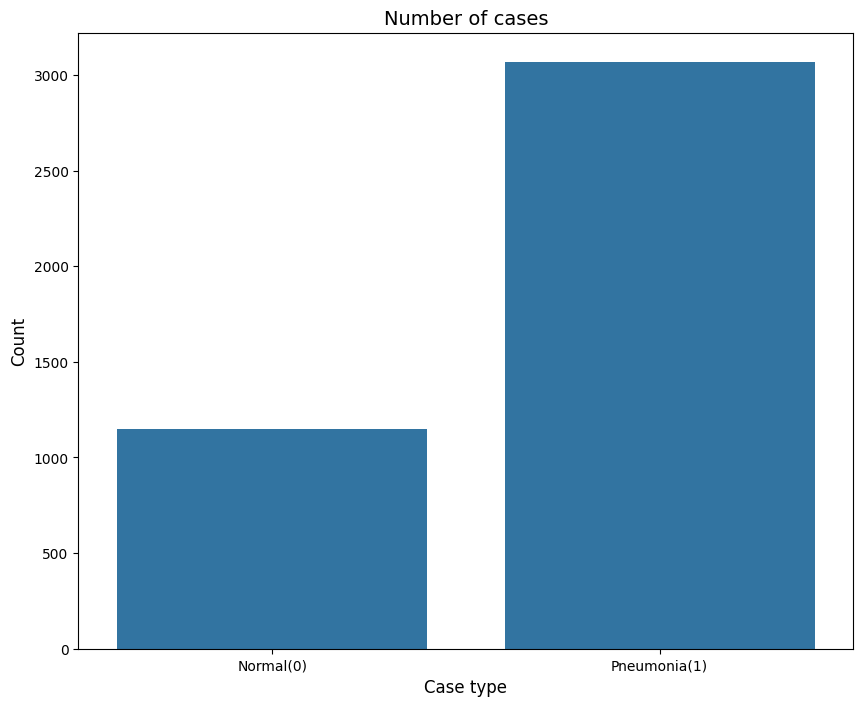

In [36]:
plotData(config.TRAIN_PATH)

label
1    869
0    303
Name: count, dtype: int64


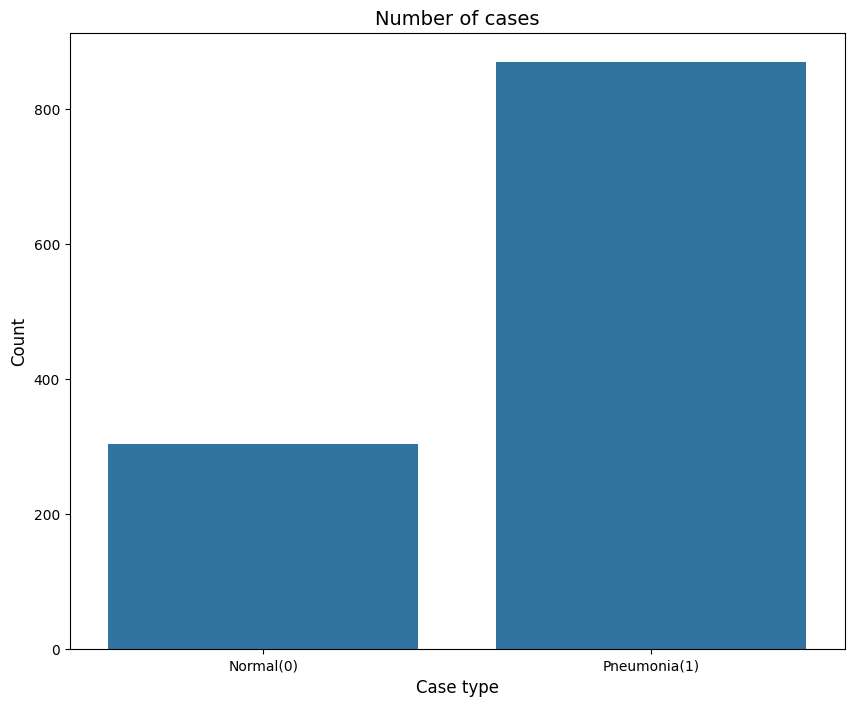

In [37]:
plotData(config.TEST_PATH)

label
1    337
0    131
Name: count, dtype: int64


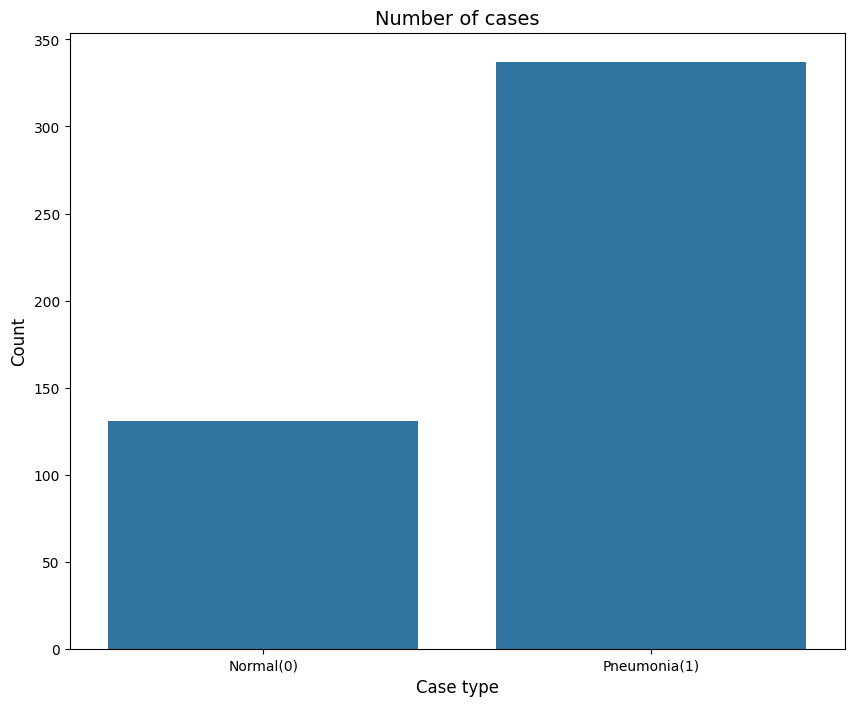

In [38]:
plotData(config.VAL_PATH)

In [39]:
#path to the normal and pneumonia sub-directories
normal_cases_dir = config.TRAIN_PATH + '/0/'
pneumonia_cases_dir = config.TRAIN_PATH + '/1/'

#list of all imgs
normal_cases = glob.glob(normal_cases_dir + '*.jpeg')
pneumonia_cases = glob.glob(pneumonia_cases_dir + '*.jpeg')

# An empty list.
train_data1 = []

# for normal cases -0
for img in normal_cases:
    train_data1.append((img,0))

# for pneumonia cases -1
for img in pneumonia_cases:
    train_data1.append((img, 1))

# Get a pandas dataframe from the data we have in our list
train_data1 = pd.DataFrame(train_data1, columns=['image', 'label'],index=None)

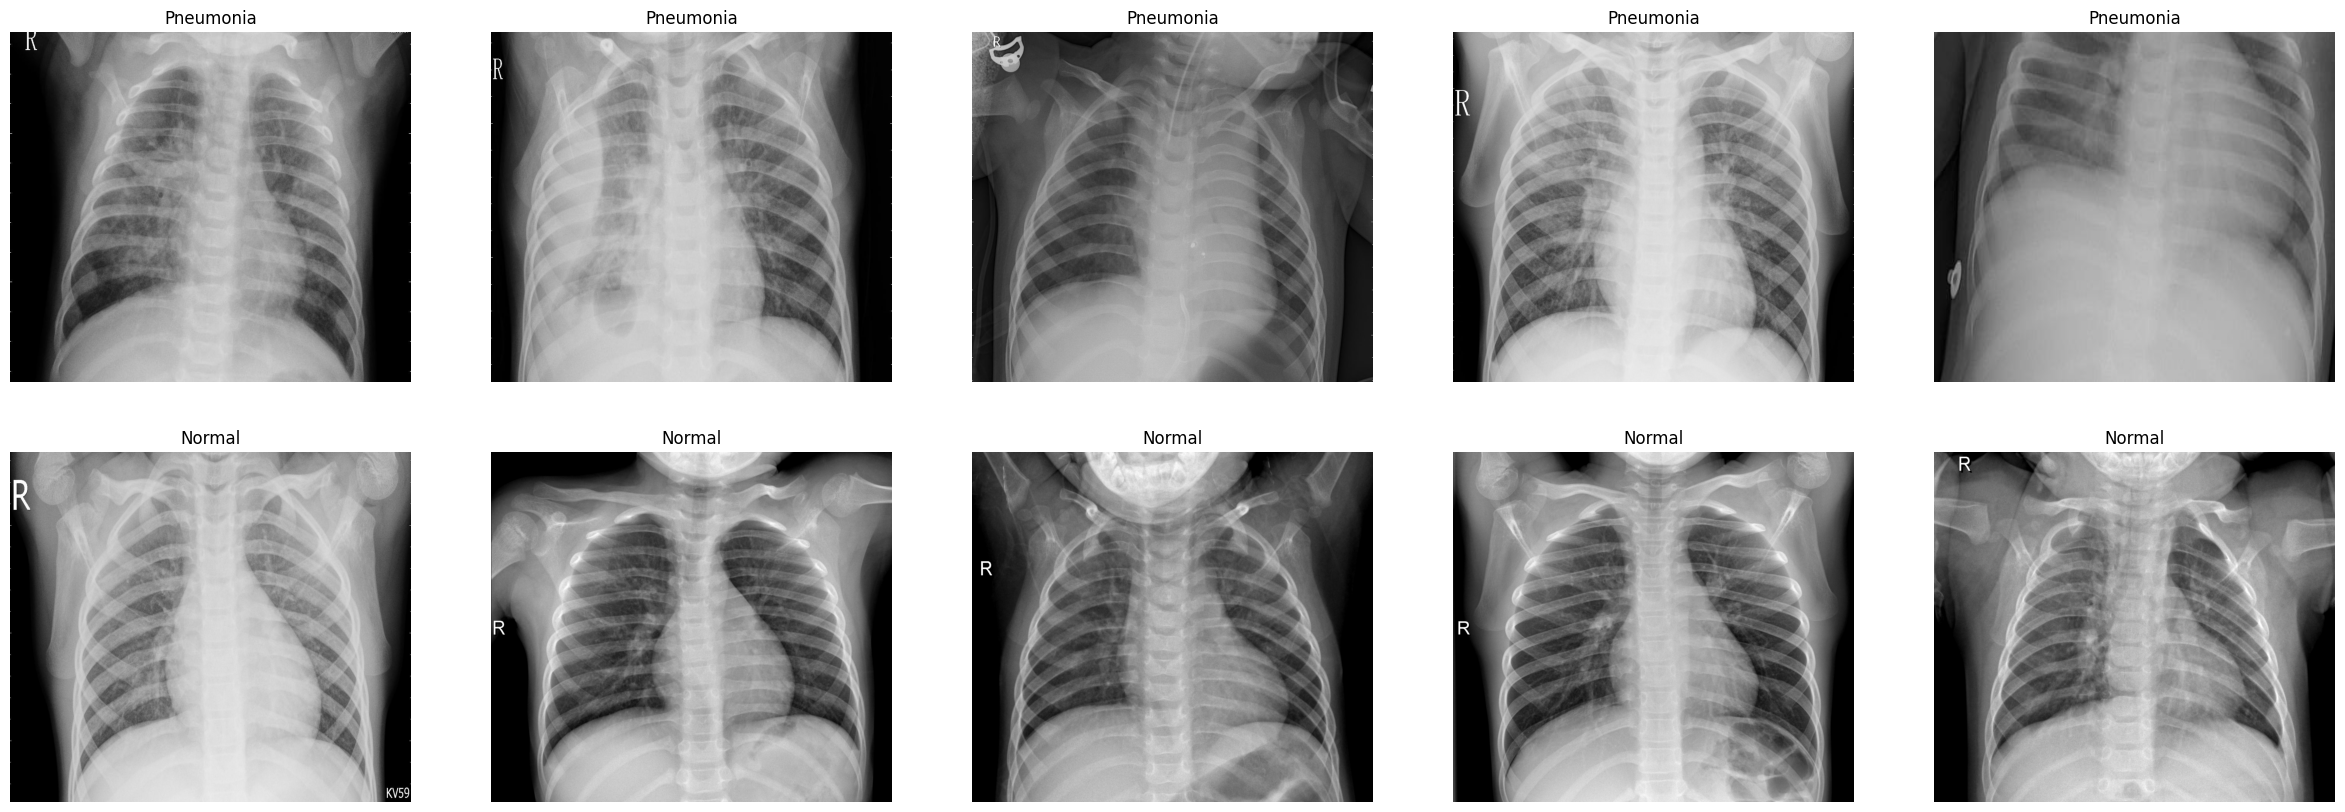

In [40]:
# Get few samples for both the classes
pneumonia_samples = (train_data1[train_data1['label']==1]['image'].iloc[:5]).tolist()
normal_samples = (train_data1[train_data1['label']==0]['image'].iloc[:5]).tolist()

# Concat the data in a single list and del the above two list
samples = pneumonia_samples + normal_samples
del pneumonia_samples, normal_samples

# Plot the data
f, ax = plt.subplots(2,5, figsize=(30,10))
for i in range(10):
    img = cv2.imread(samples[i])
    ax[i//5, i%5].imshow(img, cmap='gray')
    if i<5:
        ax[i//5, i%5].set_title("Pneumonia")
    else:
        ax[i//5, i%5].set_title("Normal")
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_aspect('auto')
plt.show()

In [41]:
# Defining a method to get the number of files given a path
def retrieveNumberOfFiles(path):
    list1 = []
    for file_name in glob.iglob(path+'/**/*.jpeg', recursive=True):
        list1.append(file_name)
    return len(list1)

In [42]:
# Defining a method to plot training and validation accuracy and loss
def training_plot(H, N, plotPath):
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
    plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Loss/Accuracy")
    plt.legend(loc="lower left")
    plt.savefig(plotPath)

In [43]:
# Checking for the total number of image paths in training, validation and testing directories
totalTrain = retrieveNumberOfFiles(config.TRAIN_PATH)
totalVal = retrieveNumberOfFiles(config.VAL_PATH)
totalTest = retrieveNumberOfFiles(config.TEST_PATH)
# Defining a method to get the number of files given a path
def getAllFiles(path):
    list1 = []
    for file_name in glob.iglob(path+'/**/*.jpeg', recursive=True):
        list1.append(file_name)
    return list1
    #ALL FILES FROM TRAIN DIREC.
    allTrainFiles = getAllFiles(config.TRAIN_PATH)

In [44]:
#ALL FILES FROM TRAIN DIREC.
allTrainFiles = getAllFiles(config.TRAIN_PATH)

In [45]:
# Calculating the total number of training images against each class and then store the class weights in a dictionary
trainLabels = [int(p.split(os.path.sep)[-2]) for p in allTrainFiles]
trainLabels = to_categorical(trainLabels)
classTotals = trainLabels.sum(axis=0)
classWeight = dict()

# Looping over all classes and calculate the class weights
for i in range(0, len(classTotals)):
    classWeight[i] = classTotals.max() / classTotals[i]

In [46]:


trainAug = ImageDataGenerator(
	preprocessing_function=preprocess_input,
	rotation_range=30,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	vertical_flip=True,
	fill_mode="nearest")

In [47]:
# Initialize the validation data augmentation object
valAug = ImageDataGenerator(preprocessing_function=preprocess_input)

In [48]:
# Initialize the training generator
trainGen = trainAug.flow_from_directory(
	config.TRAIN_PATH,
	class_mode="categorical",
	target_size=(224, 224),
	color_mode="rgb",
	shuffle=True,
	batch_size=config.BATCH_SIZE)

Found 4216 images belonging to 2 classes.


In [49]:
# Initialize the validation generator
valGen = valAug.flow_from_directory(
	config.VAL_PATH,
	class_mode="categorical",
	target_size=(224, 224),
	color_mode="rgb",
	shuffle=False,
	batch_size=config.BATCH_SIZE)

Found 468 images belonging to 2 classes.


In [50]:
# Initialize the testing generator
testGen = valAug.flow_from_directory(
	config.TEST_PATH,
	class_mode="categorical",
	target_size=(224, 224),
	color_mode="rgb",
	shuffle=False,
	batch_size=config.BATCH_SIZE)

Found 1172 images belonging to 2 classes.


In [51]:
# Loading the MobileNetV2
baseModel = MobileNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))

<ipython-input-51-53801474dc1f>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  baseModel = MobileNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [52]:
#HEADMODEL
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(len(config.CLASSES), activation="softmax")(headModel)

In [53]:
# Placing the head model on top of the base model
model = Model(inputs=baseModel.input, outputs=headModel)

In [54]:
# Loop over all the layers of the base model and freeze them so that they are not updated during the training process
for layer in baseModel.layers:
    layer.trainable = False

In [55]:
from keras.optimizers import Adam

# Compiling the model
print("Compiling model")
opt = Adam(learning_rate=config.INIT_LR, decay=config.INIT_LR / config.EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])


Compiling model


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [56]:
# Using ModelCheckpoint to store the best-performing model based on val_loss
MCName = os.path.sep.join([config.outputPath, "weights-{epoch:03d}-{val_loss:.4f}.keras"])
checkpoint = ModelCheckpoint(MCName, monitor="val_loss", mode="min", save_best_only=True, verbose=1)
callbacks = [checkpoint]


In [58]:
# Fitting the model on training data
print("Model Fitting")
MF = model.fit(
    x=trainGen,
    steps_per_epoch=totalTrain // config.BATCH_SIZE,
    validation_data=valGen,
    validation_steps=totalVal // config.BATCH_SIZE,
    class_weight=classWeight,
    callbacks=callbacks,
    epochs=config.EPOCHS)

Model Fitting
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 973ms/step - accuracy: 0.7169 - loss: 0.8971
Epoch 1: val_loss improved from inf to 0.31328, saving model to /content/output/weights-001-0.3133.keras
263/263 ━━━━━━━━━━━━━━━━━━━━ 286s 1s/step - accuracy: 0.7172 - loss: 0.8963 - val_accuracy: 0.8987 - val_loss: 0.3133
Epoch 2/20
  1/263 ━━━━━━━━━━━━━━━━━━━━ 2:19 534ms/step - accuracy: 1.0000 - loss: 0.3118

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_loss improved from 0.31328 to 0.28574, saving model to /content/output/weights-002-0.2857.keras
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.3118 - val_accuracy: 1.0000 - val_loss: 0.2857
Epoch 3/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 945ms/step - accuracy: 0.8700 - loss: 0.4394
Epoch 3: val_loss improved from 0.28574 to 0.25339, saving model to /content/output/weights-003-0.2534.keras
263/263 ━━━━━━━━━━━━━━━━━━━━ 278s 1s/step - accuracy: 0.8700 - loss: 0.4393 - val_accuracy: 0.9052 - val_loss: 0.2534
Epoch 4/20
  1/263 ━━━━━━━━━━━━━━━━━━━━ 4:14 973ms/step - accuracy: 1.0000 - loss: 0.1837
Epoch 4: val_loss improved from 0.25339 to 0.18621, saving model to /content/output/weights-004-0.1862.keras
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.1837 - val_accuracy: 1.0000 - val_loss: 0.1862
Epoch 5/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 997ms/step - accuracy: 0.8984 - loss: 0.3598
Epoch 5: val_loss did not improve from 0.18621
263/263

In [59]:
# Using ModelCheckpoint to store the best-performing model based on val_loss
MCName = os.path.sep.join([config.outputPath, "weights-{epoch:03d}-{val_loss:.4f}.keras"])
checkpoint = ModelCheckpoint(MCName, monitor="val_loss", mode="min", save_best_only=True, verbose=1)
callbacks = [checkpoint]


In [60]:
from keras.models import Model

# Assuming `model` is your trained model object
model.save("/content/output/PneumoniaPrediction.keras")
print("Model saved successfully!")


Model saved successfully!


In [61]:
from google.colab import drive
drive.mount('/content/drive')

# Save the model to your Google Drive
model.save('/content/drive/MyDrive/PneumoniaPrediction.keras')



Mounted at /content/drive


In [77]:
import os

# Set the path to the output directory
model_dir = '/content/output'
if os.path.exists(model_dir):
    model_files = os.listdir(model_dir)
    model_files = [f for f in model_files if f.endswith('.keras') or f.endswith('.h5')]

    # Print the list of model files
    if model_files:
        print("List of saved models in the output directory:")
        for model in model_files:
            print(model)
    else:
        print("No model files found in the output directory.")
else:
    print(f"The directory {model_dir} does not exist.")




List of saved models in the output directory:
weights-014-0.1170.keras
weights-002-0.2857.keras
weights-004-0.1862.keras
weights-001-0.3133.keras
PneumoniaPrediction.keras
weights-003-0.2534.keras
PneumoniaPrediction_updated.keras
weights-006-0.1491.keras


In [62]:
print(os.listdir('/content/drive/MyDrive'))


['chest_xray', 'IMG_20221218_020835.jpg', 'IMG_20221218_020912.jpg', 'Snapchat-274952498.jpg', 'IMG_20221218_020856.jpg', 'Snapchat-94116452.jpg', 'Snapchat-95676453.jpg', 'Snapchat-1946338788.jpg', 'IMG_20230236_211929.jpg', '221b493.pdf', 'Colab Notebooks', 'my_model_folder', 'PneumoniaPrediction.keras']


In [78]:
from keras.models import load_model

# Load the best model based on the lowest validation loss
best_model_path = '/content/output/weights-014-0.1170.keras'
best_model = load_model(best_model_path)

# Confirm the model is loaded
print("Best model loaded successfully!")


Best model loaded successfully!


In [79]:
from keras.models import load_model

# Load the model from the correct path
fModel = load_model('/content/output/PneumoniaPrediction.keras')
print("Model loaded successfully!")


Model loaded successfully!


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 10 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [64]:
# Predicting on the test data
print("Predicting on the test data...")
predTest = fModel.predict(testGen, steps=(totalTest // config.BATCH_SIZE) + 1)
predTest = np.argmax(predTest, axis=1)  # Convert predictions to class labels



Predicting on the test data...
74/74 ━━━━━━━━━━━━━━━━━━━━ 72s 945ms/step


In [65]:
# Evaluate the model on test data
print("Evaluating model...")
test_loss, test_accuracy = fModel.evaluate(testGen, steps=(totalTest // config.BATCH_SIZE) + 1)
print(f"Test loss: {test_loss}, Test accuracy: {test_accuracy}")


Evaluating model...
74/74 ━━━━━━━━━━━━━━━━━━━━ 62s 777ms/step - accuracy: 0.9237 - loss: 0.1956
Test loss: 0.29168322682380676, Test accuracy: 0.8796928524971008


In [66]:
from sklearn.metrics import classification_report

# Assuming testGen.classes contains the true labels
print("Classification report:")
print(classification_report(testGen.classes, predTest, target_names=testGen.class_indices.keys()))



Classification report:
              precision    recall  f1-score   support

           0       0.69      0.99      0.81       303
           1       0.99      0.84      0.91       869

    accuracy                           0.88      1172
   macro avg       0.84      0.91      0.86      1172
weighted avg       0.91      0.88      0.89      1172



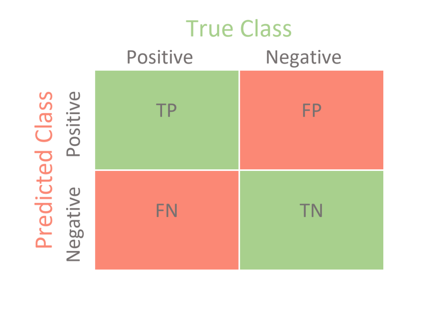

In [67]:
# Computing the confusion matrix and and using the same to derive the
# accuracy, sensitivity, and specificity

cm = confusion_matrix(testGen.classes, predTest)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

# Printing the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[299   4]
 [137 732]]
acc: 0.8797
sensitivity: 0.9868
specificity: 0.8423


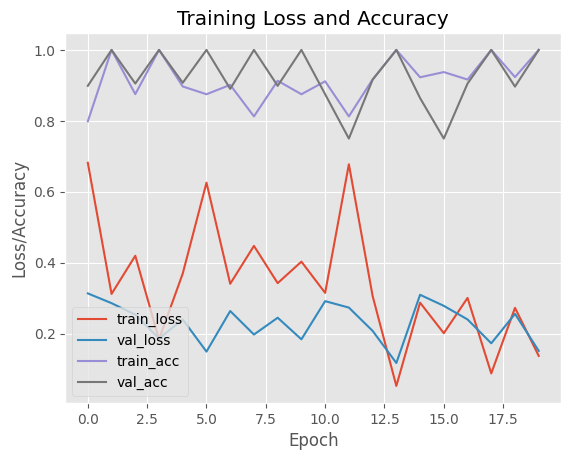

In [68]:
# Plotting the graph
training_plot(MF, config.EPOCHS, config.PLOT_PATH)

In [69]:
np.savetxt("/content/output/predictions.csv", predTest, delimiter=",")


In [71]:
fModel.save('/content/output/PneumoniaPrediction_updated.keras')
print("Model saved successfully!")



Model saved successfully!


In [73]:
# Serialize/Writing the model to disk in .keras format
print("Serializing network...")
fModel.save('/content/output/PneumoniaPrediction.keras')


Serializing network...


COPYING ALL THE FILES TO GDRIVE, changes made in collab

In [80]:
import os

# Define the destination paths in Google Drive
dataset_drive_path = '/content/drive/MyDrive/Colab Notebooks/chest-xray-pneumonia/Dataset_Backups'
output_drive_path = '/content/drive/MyDrive/Colab Notebooks/chest-xray-pneumonia/Output_Backups'

# Create the directories in Google Drive if they don't exist
os.makedirs(dataset_drive_path, exist_ok=True)
os.makedirs(output_drive_path, exist_ok=True)


In [81]:
import shutil

# Copy files from /content/dataset to Google Drive
for file_name in os.listdir('/content/dataset'):
    source_file = os.path.join('/content/dataset', file_name)
    destination_file = os.path.join(dataset_drive_path, file_name)

    if os.path.isfile(source_file):
        shutil.copy(source_file, destination_file)

# Copy files from /content/output to Google Drive
for file_name in os.listdir('/content/output'):
    source_file = os.path.join('/content/output', file_name)
    destination_file = os.path.join(output_drive_path, file_name)

    if os.path.isfile(source_file):
        shutil.copy(source_file, destination_file)

print("All files have been copied to Google Drive!")


All files have been copied to Google Drive!


In [82]:
# Verify files in Dataset_Backups
print("Files in Dataset_Backups:", os.listdir(dataset_drive_path))

# Verify files in Output_Backups
print("Files in Output_Backups:", os.listdir(output_drive_path))


Files in Dataset_Backups: []
Files in Output_Backups: ['weights-014-0.1170.keras', 'weights-002-0.2857.keras', 'weights-004-0.1862.keras', 'weights-001-0.3133.keras', 'predictions.csv', 'PneumoniaPrediction.keras', 'weights-003-0.2534.keras', 'TrainingHistoryPlot.png', 'PneumoniaPrediction_updated.keras', 'weights-006-0.1491.keras']
